In [1]:
# Import modules
import numpy as np
import pandas as pd
import nltk

# Set seed for reproducibility
np.random.seed(5)

xls = pd.ExcelFile('Glossary.xls')
xls.sheet_names

['Glossary', 'alternative_tag', 'subject_type']

In [2]:
glossary_df = xls.parse('Glossary')
print(glossary_df.head())

  language  subject_id                                   keyword  \
0      chi           0                                   國際收支平衡表   
1      eng           0                               BoP account   
2      chi           0                         甲類、乙類、丙類及綜合消費物價指數   
3      eng           0  CPI(A), CPI(B), CPI(C) and Composite CPI   
4      chi           0                                        死亡   

  simplified_definition                                  detail_definition  
0                   NaN       國際收支平衡表是有系統地載錄，在指定期間內，某經濟體系與世界各地的各類經濟交易的統計表。  
1                   NaN  A BoP account is a statistical statement that ...  
2                   NaN  綜合消費物價指數反映消費物價轉變對整體住戶的影響，而甲類、乙類及丙類消費物價指數則分別以開支...  
3                   NaN  The Composite CPI reflects the impact of consu...  
4                   NaN                         死亡指某人在活產後的任何期間，永久失去所有生命徵象。  


In [3]:
subject_df = xls.parse('subject_type')
print(subject_df.head())

   id  subject_id       chi_name  \
0   1          10  官方統計綜合報告及參考資料   
1   2          20             人口   
2   3          30             勞工   
3   4          40           對外貿易   
4   5          50    國民收入及國際收支平衡   

                                            eng_name  
0  General Reports and References in Official Sta...  
1                                         Population  
2                                             Labour  
3                                     External Trade  
4            National Income and Balance of Payments  


In [4]:
subject_df = subject_df.set_index('subject_id')
print(subject_df.head())

            id       chi_name  \
subject_id                      
10           1  官方統計綜合報告及參考資料   
20           2             人口   
30           3             勞工   
40           4           對外貿易   
50           5    國民收入及國際收支平衡   

                                                     eng_name  
subject_id                                                     
10          General Reports and References in Official Sta...  
20                                                 Population  
30                                                     Labour  
40                                             External Trade  
50                    National Income and Balance of Payments  


In [5]:
theme_df = glossary_df[['subject_id', 'language', 'keyword', 'detail_definition']]
print(theme_df.head())

   subject_id language                                   keyword  \
0           0      chi                                   國際收支平衡表   
1           0      eng                               BoP account   
2           0      chi                         甲類、乙類、丙類及綜合消費物價指數   
3           0      eng  CPI(A), CPI(B), CPI(C) and Composite CPI   
4           0      chi                                        死亡   

                                   detail_definition  
0       國際收支平衡表是有系統地載錄，在指定期間內，某經濟體系與世界各地的各類經濟交易的統計表。  
1  A BoP account is a statistical statement that ...  
2  綜合消費物價指數反映消費物價轉變對整體住戶的影響，而甲類、乙類及丙類消費物價指數則分別以開支...  
3  The Composite CPI reflects the impact of consu...  
4                         死亡指某人在活產後的任何期間，永久失去所有生命徵象。  


In [6]:
theme_df_pivot = theme_df.pivot(columns='language', values=['subject_id', 'keyword', 'detail_definition'])
# flatten multiindex
theme_df_pivot.columns = ['_'.join(col).strip() for col in theme_df_pivot.columns.values]
print(theme_df_pivot.head())

  subject_id_chi subject_id_eng        keyword_chi  \
0              0            NaN            國際收支平衡表   
1            NaN              0                NaN   
2              0            NaN  甲類、乙類、丙類及綜合消費物價指數   
3            NaN              0                NaN   
4              0            NaN                 死亡   

                                keyword_eng  \
0                                       NaN   
1                               BoP account   
2                                       NaN   
3  CPI(A), CPI(B), CPI(C) and Composite CPI   
4                                       NaN   

                               detail_definition_chi  \
0       國際收支平衡表是有系統地載錄，在指定期間內，某經濟體系與世界各地的各類經濟交易的統計表。   
1                                                NaN   
2  綜合消費物價指數反映消費物價轉變對整體住戶的影響，而甲類、乙類及丙類消費物價指數則分別以開支...   
3                                                NaN   
4                         死亡指某人在活產後的任何期間，永久失去所有生命徵象。   

                               detail_definition_eng  


In [7]:
eng_df = theme_df_pivot[['subject_id_eng', 'keyword_eng', 'detail_definition_eng']]
eng_df.head()

,subject_id_eng,keyword_eng,detail_definition_eng
0,NaN,NaN,NaN
1,0,BoP account,A BoP account is a statistical statement that ...
2,NaN,NaN,NaN
3,0,"CPI(A), CPI(B), CPI(C) and Composite CPI",The Composite CPI reflects the impact of consu...
4,NaN,NaN,NaN


In [8]:
eng_df = eng_df.dropna()
print(eng_df.head())
print(eng_df.describe())

  subject_id_eng                               keyword_eng  \
1              0                               BoP account   
3              0  CPI(A), CPI(B), CPI(C) and Composite CPI   
5              0                                     Death   
7              0                        Domestic household   
9              0                          Employed persons   

                               detail_definition_eng  
1  A BoP account is a statistical statement that ...  
3  The Composite CPI reflects the impact of consu...  
5  A death refers to the permanent disappearance ...  
7  Consist of a group of persons who live togethe...  
9  Refer to those persons aged >=15 who have been...  
        subject_id_eng    keyword_eng  \
count              728            728   
unique              34            345   
top                170  Establishment   
freq                65              9   

                                    detail_definition_eng  
count                          

In [9]:
# eng_df['concat'] = eng_df['keyword_eng'] + ' ' + eng_df['detail_definition_eng']
# eng_df = eng_df[['subject_id_eng', 'concat']]
# print(eng_df.head())

In [10]:
eng_dfg = eng_df.groupby('subject_id_eng')
print(eng_dfg.get_group(0))
print(eng_dfg.get_group(0).info())

   subject_id_eng                               keyword_eng  \
1               0                               BoP account   
3               0  CPI(A), CPI(B), CPI(C) and Composite CPI   
5               0                                     Death   
7               0                        Domestic household   
9               0                          Employed persons   
11              0                       Exports of services   
13              0              Gross Domestic Product (GDP)   
15              0                          Imports of goods   
17              0                       Imports of services   
19              0                        Insurance services   
21              0                              Labour force   
23              0                        Nominal Wage Index   
25              0                    Total exports of goods   
27              0                   Total merchandise trade   
29              0                      Underemployment 

In [11]:
# Since subject_id 0 is not a theme, but a predefined category
eng_clean_df = eng_df[eng_df['subject_id_eng'] != 0]
print(eng_clean_df)

     subject_id_eng                                        keyword_eng  \
34               20                                 "De facto" concept   
36               20                                  "De jure" concept   
38               20                             Child dependency ratio   
40               20                                   Crude birth rate   
42               20                                   Crude death rate   
44               20                                Crude marriage rate   
46               20                                              Death   
48               20                                 Domestic household   
50               20                           Elderly dependency ratio   
52               20                       Expectation of life at birth   
54               20                       Extended "de facto" approach   
56               20                                        Live births   
58               20                   

In [12]:
merged_series = eng_clean_df.groupby('subject_id_eng')['detail_definition_eng'].apply(' '.join)
print(merged_series)

subject_id_eng
20     Under a "de facto" concept, the population inc...
30     Casual employee refers to an employee who is e...
40     Charges for the use of intellectual property r...
50     Balance of Payments (BoP) is a statistical sta...
60     The Consumer Price Index (CPI) measures the ch...
70     (i) For the Industry Section of Transportation...
120    R&amp;D capital expenditure includes actual ex...
130    Total cargo discharged includes imports and in...
150    Under a "de facto" concept, the population inc...
160    Under a "de facto" concept, the population inc...
170    If a person is able to conduct a short convers...
180    Under a "de facto" concept, the population inc...
190    Under a "de facto" concept, the population inc...
200    Casual employee refers to an employee who is e...
210    Hourly wage is derived by dividing (i) the amo...
230    Exports of goods to the mainland of China for ...
240    Charges for the use of intellectual property r...
250    Changes i

In [13]:
# read subject_id_dict
subject_id_dict = subject_df['eng_name'].to_dict()
print(subject_id_dict)

{10: 'General Reports and References in Official Statistics', 20: 'Population', 30: 'Labour', 40: 'External Trade', 50: 'National Income and Balance of Payments', 60: 'Prices', 70: 'Business Performance', 80: 'The Four Key Industries and the Six Industries', 90: 'Energy', 100: 'Housing and Property', 110: 'Public Accounts, Money and Finance', 120: 'Science and Technology', 130: 'Transport, Communications and Tourism', 140: 'Miscellaneous Statistics', 150: 'Population Estimates', 160: 'Demographics', 170: '2011 Population Census', 180: 'Gender', 190: 'Population Projections', 200: 'Labour Force', 452: 'Employment and Vacancies', 210: 'Wages and Labour Earnings', 220: 'Manpower', 230: 'Merchandise Trade', 240: 'Trade in Services', 250: 'National Income', 260: 'Balance of Payments', 270: 'Consumer Prices', 280: 'Producer Prices', 290: 'Household Expenditures', 300: 'Business Performance and Prospects', 310: 'Industrial Production', 320: 'Import/export, wholesale and retail trades, and acc

In [14]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
stemmer = SnowballStemmer("english")
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    
    tokens = nltk.word_tokenize(text)
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english') if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Toby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
words_stemmed = tokenize_and_stem(merged_series[20])
print(words_stemmed)

['under', 'de', 'facto', 'concept', 'popul', 'includ', 'person', 'country/territori', 'refer', 'time-point', 'that', 'method', 'equival', 'take', 'snapshot', 'popul', 'refer', 'time-point', 'under', 'de', 'jure', 'concept', 'person', 'usual', 'live', 'country/territori', 'particular', 'refer', 'time-point', 'usual', 'taken', 'middl', 'year', 'count', 'popul', 'country/territori', 'child', 'depend', 'ratio', 'refer', 'number', 'person', 'age', 'per', 'person', 'age', 'crude', 'birth', 'rate', 'refer', 'number', 'live', 'birth', 'given', 'year', 'per', 'mid-year', 'popul', 'year', 'crude', 'death', 'rate', 'refer', 'number', 'death', 'given', 'year', 'per', 'mid-year', 'popul', 'year', 'crude', 'marriag', 'rate', 'refer', 'number', 'marriag', 'regist', 'given', 'year', 'per', 'mid-year', 'popul', 'year', 'a', 'death', 'refer', 'perman', 'disappear', 'evid', 'life', 'live', 'birth', 'taken', 'place', 'a', 'domest', 'household', 'consist', 'group', 'person', 'live', 'togeth', 'make', 'comm

In [17]:
# Create TfidfVectorizer
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [18]:
# Fit and transform the tfidf_vectorizer with the "description" of subject
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in merged_series])

print(tfidf_matrix.shape)

C:\Users\Toby\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(33, 805)


# Import KMeans and create clusters

In [19]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# All subject id could be group by 17 category(according to subject_id 0) and 1 miscellaneous
km = KMeans(n_clusters=17)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()
print(clusters)

[1, 8, 6, 5, 3, 14, 7, 10, 1, 1, 15, 1, 1, 2, 8, 6, 4, 5, 5, 3, 12, 3, 0, 13, 14, 14, 0, 0, 11, 8, 9, 15, 16]


In [20]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [21]:
# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

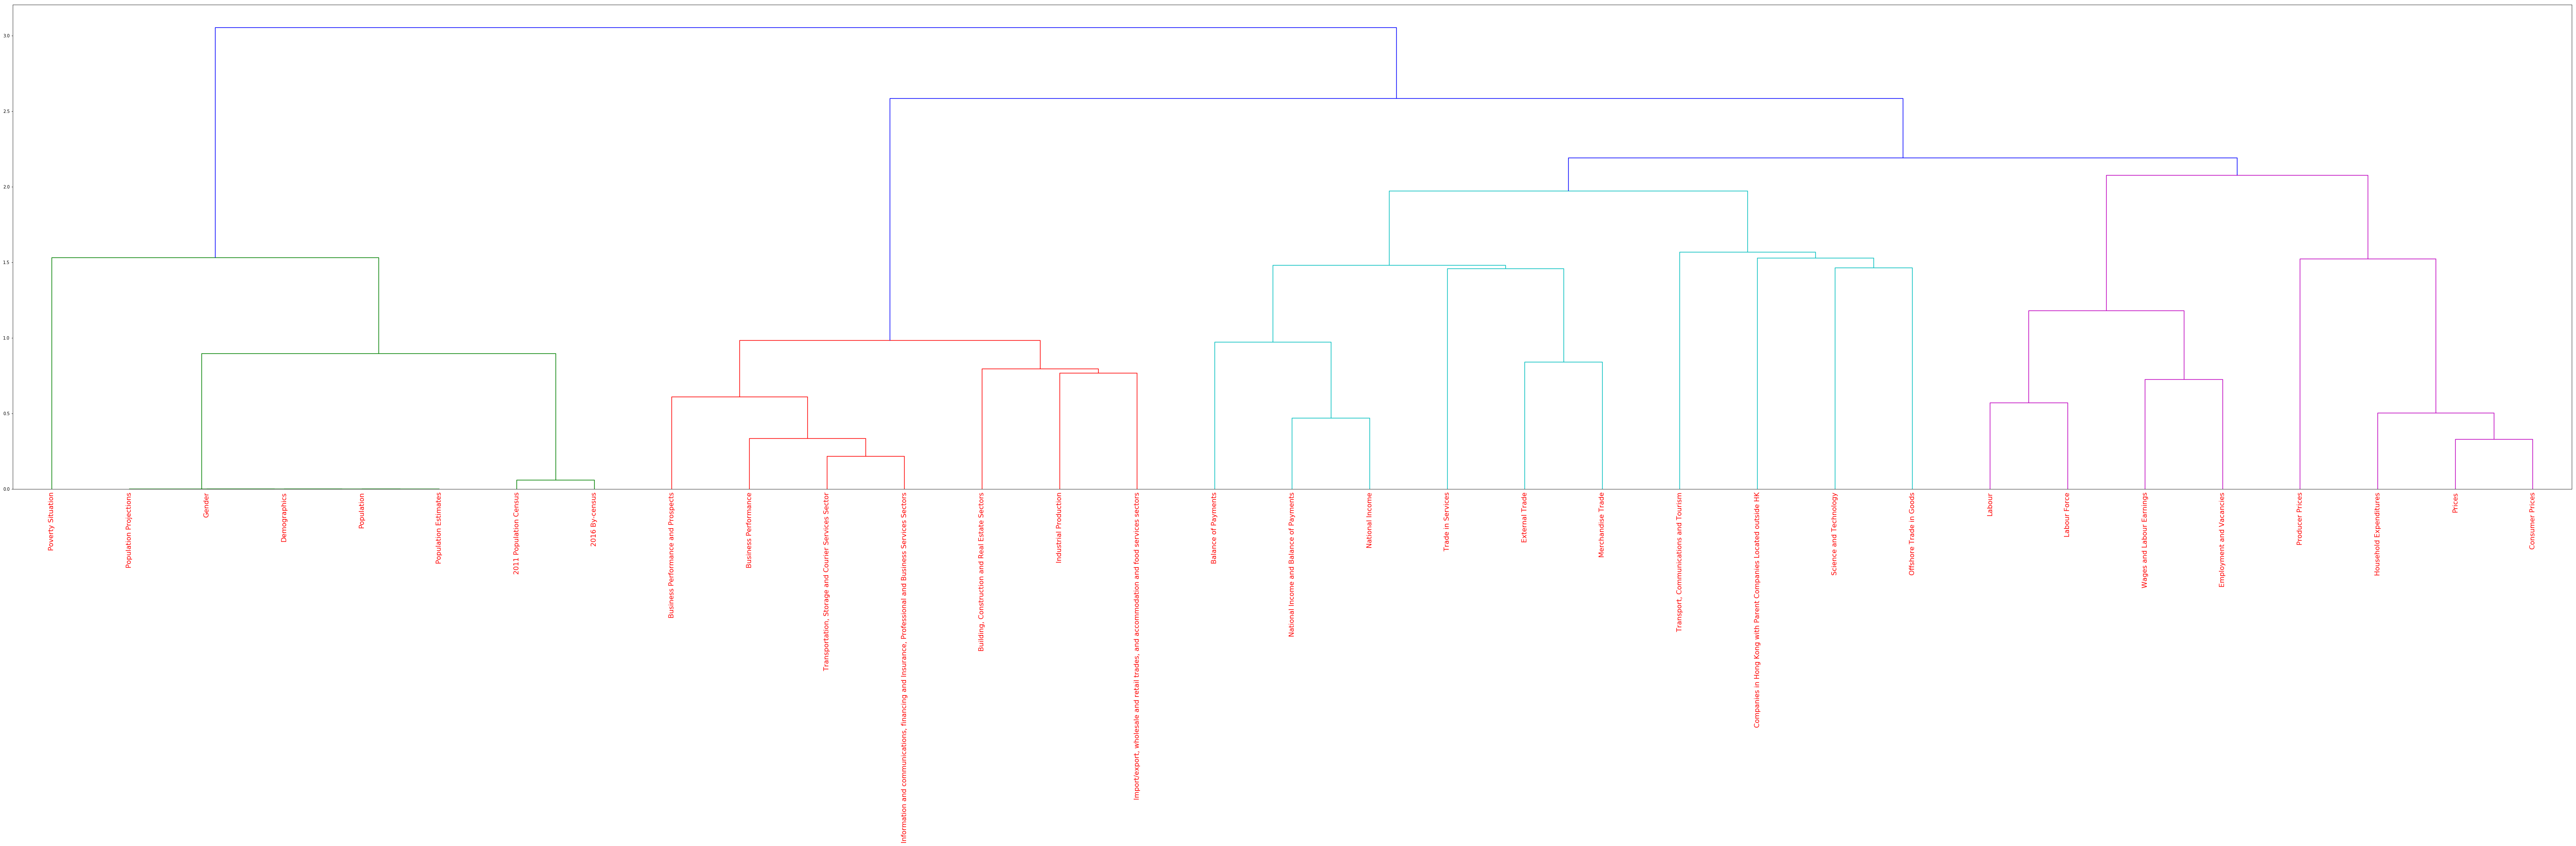

In [22]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[subject_id_dict[x] for x in merged_series.index],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()

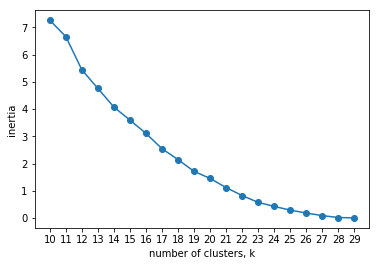

In [23]:
#testing how many cluster should be applied
#choose when the decrease in inertia start to decrease 
ks = range(10, 30)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(tfidf_matrix)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# the best cluster should be around 20 where the slope starts to decrease